In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
meteo=pd.read_csv("/Users/carolinavega/Documents/UCM/Contaminacion/ene_meteo21.csv", sep=";")

In [127]:
meteo.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2021,1,1,0.98,V,...,2.83,V,3.65,V,2.13,V,0.97,V,0.58,V
1,28,79,102,81,28079102_81_98,2021,1,2,1.18,V,...,1.30,V,1.22,V,0.38,V,0.45,V,0.75,V
2,28,79,102,81,28079102_81_98,2021,1,3,0.62,V,...,1.92,V,1.53,V,2.20,V,1.80,V,1.27,V
3,28,79,102,81,28079102_81_98,2021,1,4,1.93,V,...,1.20,V,1.10,V,1.72,V,1.05,V,1.48,V
4,28,79,102,81,28079102_81_98,2021,1,5,1.62,V,...,0.30,V,0.48,V,0.12,V,0.32,V,0.93,V


In [128]:
meteo['PARAMETRO']=meteo.PUNTO_MUESTREO.str[9:11]




In [129]:
meteo['PARAMETRO'] = pd.to_numeric(meteo['PARAMETRO'], errors='coerce')

In [130]:
meteo['H13'] = pd.to_numeric(meteo['H13'], errors='coerce')

In [131]:
parametro_mapping = {
    80: 'RADIACION ULTRAVIOLETA',
    81: 'VELOCIDAD VIENTO',
    82: 'DIR. DE VIENTO',
    83: 'TEMPERATURA',
    86: 'HUMEDAD RELATIVA',
    87: 'PRESION BARIOMETRICA',
    88: 'RADIACION SOLAR',
    99: 'PRECIPITACIÓN'
}

# Crear un nuevo campo 'ETNIA_DESC' basado en la asignación
meteo['PARAM_DESC'] = meteo['PARAMETRO'].map(parametro_mapping)

In [132]:
def obtener_direccion_viento(angulo):
    if 337.5 <= angulo < 22.5 or (angulo >= 337.5 and angulo <= 360) or (angulo >= 0 and angulo < 22.5):
        return 'Norte'
    elif 22.5 <= angulo < 67.5:
        return 'Noreste'
    elif 67.5 <= angulo < 112.5:
        return 'Este'
    elif 112.5 <= angulo < 157.5:
        return 'Sureste'
    elif 157.5 <= angulo < 202.5:
        return 'Sur'
    elif 202.5 <= angulo < 247.5:
        return 'Suroeste'
    elif 247.5 <= angulo < 292.5:
        return 'Oeste'
    elif 292.5 <= angulo < 337.5:
        return 'Noroeste'
    else:
        return 'Desconocido'


# Supongamos que tienes una columna 'DIR_VIENTO' en tu DataFrame con los ángulos del viento
# Puedes aplicar la función así:



In [133]:

meteo['DIRECCION_VIENTO'] = meteo['H13'].apply(obtener_direccion_viento)

In [154]:
direcion_viento = meteo[(meteo["PARAMETRO"] == 82) | (meteo["PARAMETRO"] == 81)]


In [155]:
columns=["PROVINCIA", "MUNICIPIO","ESTACION","MAGNITUD","PUNTO_MUESTREO","ANO","MES","DIA","H13","V13","PARAMETRO","PARAM_DESC","DIRECCION_VIENTO"]

In [156]:
direcion_viento = direcion_viento[columns]

In [157]:
direcion_viento = direcion_viento[(direcion_viento['DIA'] >= 15) & (direcion_viento['DIA'] <= 20)]



In [158]:
direcion_viento.head(10)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H13,V13,PARAMETRO,PARAM_DESC,DIRECCION_VIENTO
14,28,79,102,81,28079102_81_98,2021,1,15,0.88,V,81,VELOCIDAD VIENTO,Norte
15,28,79,102,81,28079102_81_98,2021,1,16,0.48,V,81,VELOCIDAD VIENTO,Norte
16,28,79,102,81,28079102_81_98,2021,1,17,1.62,V,81,VELOCIDAD VIENTO,Norte
17,28,79,102,81,28079102_81_98,2021,1,18,0.58,V,81,VELOCIDAD VIENTO,Norte
18,28,79,102,81,28079102_81_98,2021,1,19,1.27,V,81,VELOCIDAD VIENTO,Norte
19,28,79,102,81,28079102_81_98,2021,1,20,2.18,V,81,VELOCIDAD VIENTO,Norte
45,28,79,102,82,28079102_82_98,2021,1,15,139.00,V,82,DIR. DE VIENTO,Sureste
46,28,79,102,82,28079102_82_98,2021,1,16,127.00,V,82,DIR. DE VIENTO,Sureste
47,28,79,102,82,28079102_82_98,2021,1,17,87.00,V,82,DIR. DE VIENTO,Este
48,28,79,102,82,28079102_82_98,2021,1,18,94.00,V,82,DIR. DE VIENTO,Este


/var/folders/qv/k9y_xndn7gqf4p45_btdd55h0000gn/T/ipykernel_11780/3489321568.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='DIA', y='DIRECCION_VIENTO', data=direcion_viento, palette='bright', size=8, jitter=True)


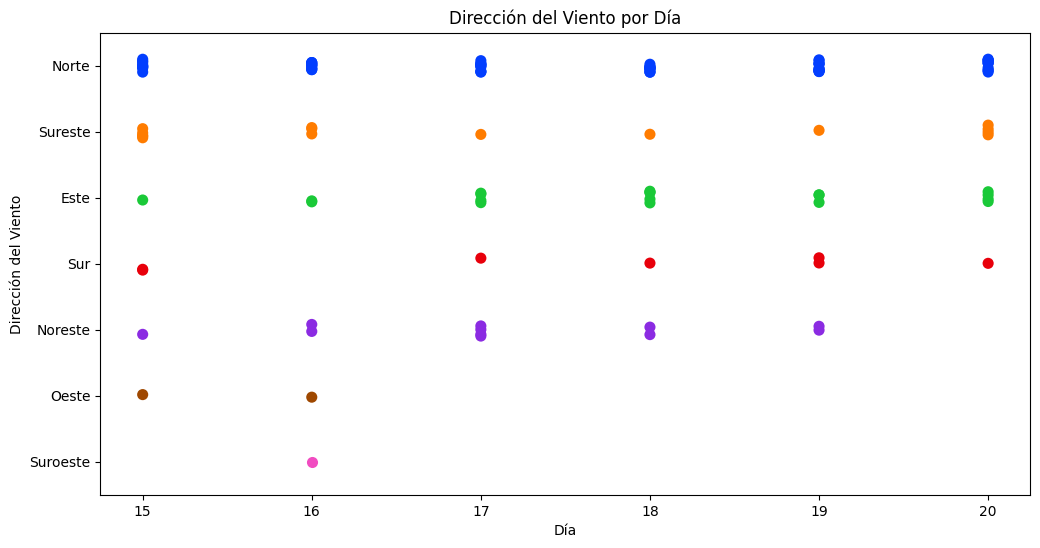

In [162]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='DIA', y='DIRECCION_VIENTO', data=direcion_viento, palette='bright', size=8, jitter=True)
plt.title('Dirección del Viento por Día')
plt.xlabel('Día')
plt.ylabel('Dirección del Viento')
plt.show()

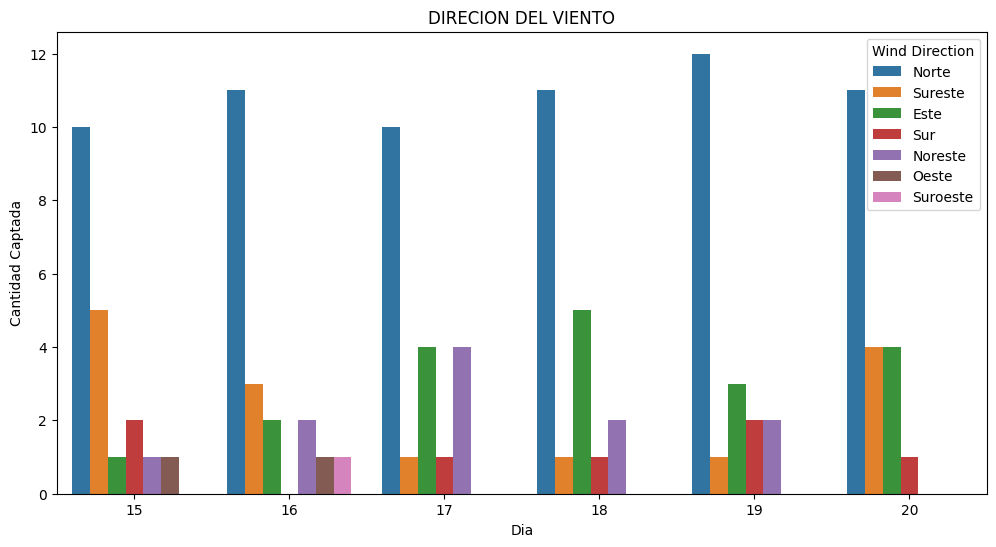

In [159]:
# Create a bar plot grouped by day
plt.figure(figsize=(12, 6))
sns.countplot(x='DIA', hue='DIRECCION_VIENTO', data=direcion_viento)
plt.title('DIRECION DEL VIENTO')
plt.xlabel('Dia')
plt.ylabel('Cantidad Captada')
plt.legend(title='Wind Direction', loc='upper right')
plt.show()

In [141]:
direcion_viento['DIRECCION_VIENTO'] = direcion_viento['H13'].apply(obtener_direccion_viento)


In [142]:
meteo_dias = meteo[(meteo['DIA'] >= 15) & (meteo['DIA'] <= 20)]

In [143]:
meteo_dias.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,V21,H22,V22,H23,V23,H24,V24,PARAMETRO,PARAM_DESC,DIRECCION_VIENTO
14,28,79,102,81,28079102_81_98,2021,1,15,0.22,V,...,V,0.32,V,0.12,V,0.32,V,81,VELOCIDAD VIENTO,Norte
15,28,79,102,81,28079102_81_98,2021,1,16,0.25,V,...,V,0.70,V,0.28,V,0.63,V,81,VELOCIDAD VIENTO,Norte
16,28,79,102,81,28079102_81_98,2021,1,17,0.97,V,...,V,0.52,V,0.53,V,0.72,V,81,VELOCIDAD VIENTO,Norte
17,28,79,102,81,28079102_81_98,2021,1,18,0.30,V,...,V,1.03,V,0.97,V,1.03,V,81,VELOCIDAD VIENTO,Norte
18,28,79,102,81,28079102_81_98,2021,1,19,0.88,V,...,V,0.38,V,0.50,V,0.45,V,81,VELOCIDAD VIENTO,Norte


In [144]:
print(meteo_dias['DIRECCION_VIENTO'].dtype)


object


In [145]:
meteo_dias['DIRECCION_VIENTO'] = meteo_dias['DIRECCION_VIENTO'].astype(str)


/var/folders/qv/k9y_xndn7gqf4p45_btdd55h0000gn/T/ipykernel_11780/2431669246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_dias['DIRECCION_VIENTO'] = meteo_dias['DIRECCION_VIENTO'].astype(str)


In [146]:
print(meteo_dias['DIRECCION_VIENTO'].unique())


['Norte' 'Sureste' 'Este' 'Noreste' 'Desconocido' 'Sur' 'Oeste' 'Suroeste']


In [147]:
print(meteo_dias['DIRECCION_VIENTO'].isnull().sum())


0


In [148]:
print(meteo_dias.dtypes)


PROVINCIA             int64
MUNICIPIO             int64
ESTACION              int64
MAGNITUD              int64
PUNTO_MUESTREO       object
ANO                   int64
MES                   int64
DIA                   int64
H01                 float64
V01                  object
H02                 float64
V02                  object
H03                 float64
V03                  object
H04                 float64
V04                  object
H05                 float64
V05                  object
H06                 float64
V06                  object
H07                 float64
V07                  object
H08                 float64
V08                  object
H09                 float64
V09                  object
H10                 float64
V10                  object
H11                 float64
V11                  object
H12                 float64
V12                  object
H13                 float64
V13                  object
H14                 float64
V14                 

In [149]:
direcion_viento['DIRECCION_VIENTO'] = direcion_viento['DIRECCION_VIENTO'].str.lower()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/qv/k9y_xndn7gqf4p45_btdd55h0000gn/T/ipykernel_11780/2697965813.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


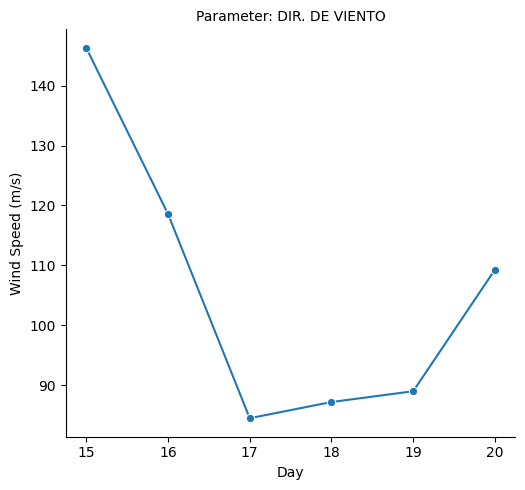

In [150]:
g = sns.FacetGrid(direcion_viento, col='PARAM_DESC', col_wrap=2, height=5, sharex=False, sharey=False)

# Map lineplot to each subplot with markers colored by 'DIRECCION_VIENTO'
g.map(sns.lineplot, 'DIA', 'H13', marker='o', palette='bright', ci=None)

# Set axis labels and titles
g.set_axis_labels('Day', 'Wind Speed (m/s)')
g.set_titles('Parameter: {col_name}')

# Adjust layout
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/qv/k9y_xndn7gqf4p45_btdd55h0000gn/T/ipykernel_11780/874990843.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


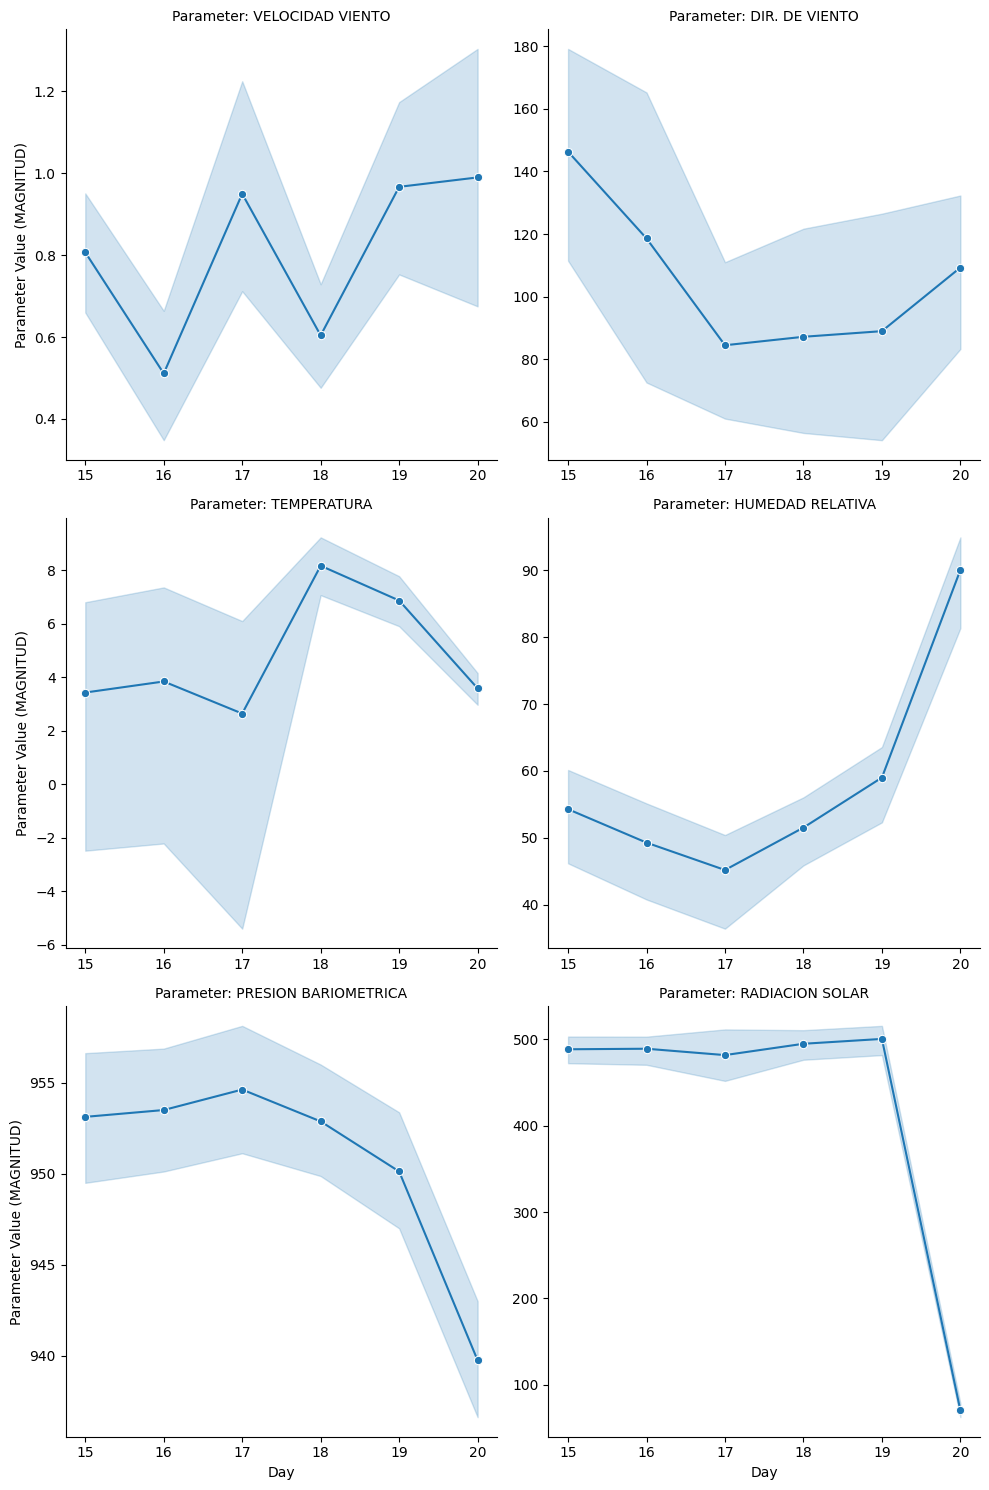

In [151]:
# Create a FacetGrid with customized y-axis limits
g = sns.FacetGrid(meteo_dias, col='PARAM_DESC', col_wrap=2, height=5, sharex=False, sharey=False)

# Map lineplot to each subplot
g.map(sns.lineplot, 'DIA', 'H13', marker='o')

# Set axis labels and titles
g.set_axis_labels('Day', 'Parameter Value (MAGNITUD)')
g.set_titles('Parameter: {col_name}')

# Adjust layout
plt.tight_layout()
plt.show()
